In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib; matplotlib.rcParams['figure.figsize'] = (8,3)

In [2]:
import numpy as np
from simple import SimpleMatrixFactorization

In [3]:
# Reload all packages - make debugging easier
%load_ext autoreload
%autoreload 2

---

In [4]:
def plot_R(rhats, r=None, title=''):
    _, n_items = rhats.shape
    f, axes = plt.subplots(1, n_items, sharex=True, sharey=True)
    i = 0
    for j in range(n_items):
        if r is not None:
            axes[j].axvline(x=r[j], color='r')
        axes[j].hist(rhats[:,j])
    plt.xlim([0,6])
    f.suptitle(title)
    plt.show()

In [5]:
R= np.array([[1,2,2,4,5],\
            [5,5,5,2,1],\
            [5,5,5,2,1],\
            [1,2,1,4,5],\
            [2,2,1,4,5],\
            [4,5,5,2,2],\
            [1,2,1,5,5],\
            [5,5,5,2,1],\
            [5,5,5,2,1],\
            [1,2,1,4,5],\
            [2,2,1,4,5],\
            [4,5,5,2,2],\
            [1,2,1,5,5],\
            [5,5,5,2,1],\
            [5,5,5,2,1],\
            [1,2,1,4,5],\
            [2,2,1,4,5],\
            [4,5,5,2,2],\
            [1,2,1,5,5],\
            [5,5,5,2,1],\
            [2,2,1,5,4]])
            

mask = np.array([[1,1,1,1,1],\
                  [0,0,0,0,0],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1]])

In [6]:
model = SimpleMatrixFactorization(ratings_matrix=R, hidden_dim=2, batch_size=5)

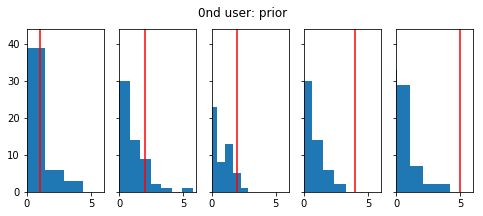

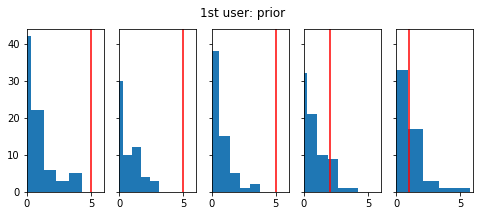

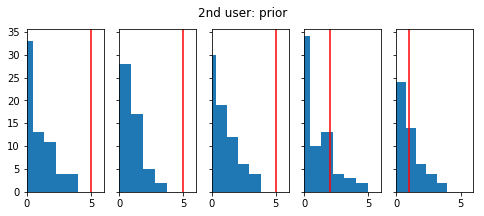

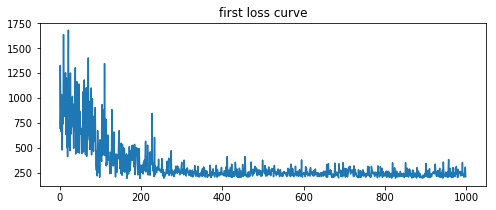

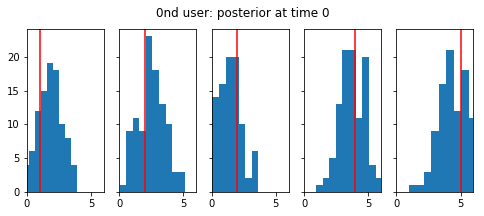

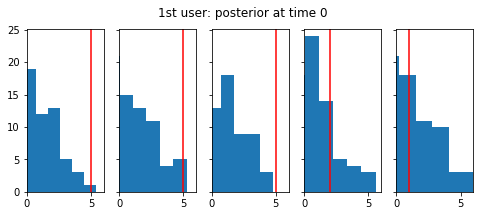

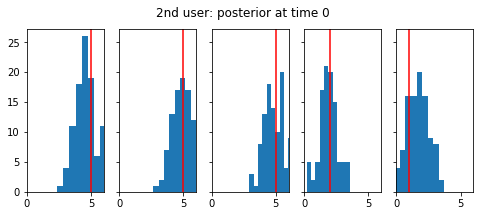

In [7]:
def plot(title):
    plot_R(model.sample_user_ratings(0), R[0,:], title='0nd user: {}'.format(title))
    plot_R(model.sample_user_ratings(1), R[1,:], title='1st user: {}'.format(title))
    plot_R(model.sample_user_ratings(2), R[2,:], title='2nd user: {}'.format(title))

plot('prior')

losses = model.train(mask=mask, verbose=True)
plt.plot(losses)
plt.title('first loss curve')
plt.show()
plot('posterior at time 0')

# mask = np.array([[1,1,1,1,1],
#                  [1,0,1,0,0],
#                  [1,1,1,1,1]])
# losses = model.train(mask=mask, verbose=True)
# plot('posterior at time 1')

Note the simple model is smoothing over the unknown user's predictions. I wonder if this can be fixed with better hyperparams.